In [184]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

rate = pd.read_csv('../data/base_rate.csv.csv')
df = pd.read_csv('c:/users/user/Tone_doc.csv')
df.rename(columns={'TONE_Doc':'TONE_mkt'}, inplace = True)

In [185]:
tone_rate = df.merge(rate, on='date', how='outer').dropna().reset_index(drop=True)

In [194]:
tone_rate

,date,TONE_mkt,rate
0,2008-04-10,0.276923,5.00
1,2008-05-08,0.328467,5.00
2,2008-06-12,0.354839,5.00
3,2008-07-10,0.369048,5.00
4,2008-08-07,0.309353,5.25
...,...,...,...
129,2020-01-17,-0.529412,1.25
130,2020-02-27,-0.391753,1.25
131,2020-04-09,-0.625000,0.75
132,2020-05-28,-0.622951,0.50


In [197]:
tone_rate.corr()

,TONE_mkt,rate
TONE_mkt,1.000000,0.592724
rate,0.592724,1.000000


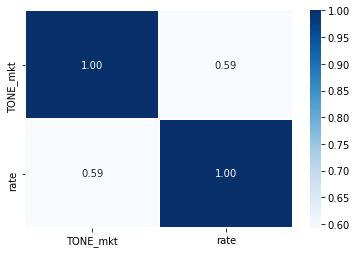

In [193]:
sns.heatmap(tone_rate.corr(), annot = True, fmt='.2f', linewidths=.5, cmap = 'Blues')

([<matplotlib.axis.XTick at 0x141595a50b8>,
 <a list of 7 Text major ticklabel objects>)

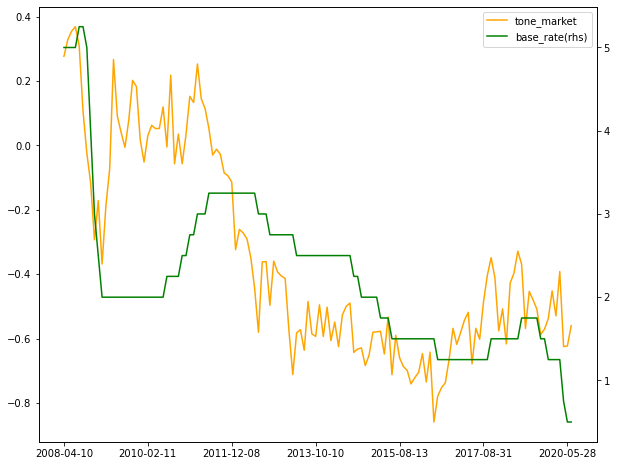

In [188]:
fig, ax1 = plt.subplots(figsize=(10,8))
ax2 = ax1.twinx()

line1 = ax1.plot(tone_rate.date, tone_rate.TONE_mkt, color='orange', label = 'tone_market')
line2 = ax2.plot(tone_rate.date, tone_rate.rate, color='green', label = 'base_rate(rhs)')

lines = line1 + line2
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, loc=1)

plt.xticks(tone_rate.date[::22])